# <a id='toc1_'></a>[AML Project - Uber & Lyft Ride Share](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [AML Project - Uber & Lyft Ride Share](#toc1_)    
  - [Importing Dataset](#toc1_1_)    
  - [Data Preprocessing](#toc1_2_)    
  - [Data Cleaning](#toc1_3_)    
  - [Correlation of temperature related features with our target feature (Price)](#toc1_4_)    
  - [Correlation of our categorical features with our target feature (price)](#toc1_5_)    
  - [Exploratory Data Analysis](#toc1_6_)    
    - [Price Distribution](#toc1_6_1_)    
    - [PRice Range Distribution](#toc1_6_2_)    
    - [Time Series Analysis on Surge Multiplier](#toc1_6_3_)    
    - [Day-to-Day Ride Distribution](#toc1_6_4_)    
    - [ Source and Destination Analysis](#toc1_6_5_)    
    - [Cab Type Value Counts](#toc1_6_6_)    
    - [Popular Source - Destination Combination](#toc1_6_7_)    
    - [Uber v/s Lyft : Rides by hour](#toc1_6_8_)    
 

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_1_'></a>[Importing Dataset](#toc0_)

In [49]:
rideshare=pd.read_csv("rideshare_kaggle.csv")
rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [50]:
rideshare_df=pd.read_csv("rideshare_kaggle.csv")


## <a id='toc1_2_'></a>[Data Preprocessing](#toc0_)

In [52]:
rideshare.shape

(693071, 57)

In [53]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [54]:
# Get the data types of all columns
column_types = rideshare.dtypes

# Count the numerical and categorical columns
numerical_count = sum(column_types == 'int64') + sum(column_types == 'float64')
categorical_count = sum(column_types == 'object')

print("Total numerical columns:", numerical_count)
print("Total categorical columns:", categorical_count)

Total numerical columns: 46
Total categorical columns: 11


## <a id='toc1_3_'></a>[Data Cleaning](#toc0_)

In [56]:
#Converting Datetime column to datetime datatype
rideshare['datetime']=pd.to_datetime(rideshare['datetime'])

In [57]:
# Checking if there are duplicated rows
print('{} of data is duplicated rows'.format(
    str(round(rideshare.duplicated().sum() / rideshare.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [58]:
# Checking if there are Nulvalues
print('{} of data is NuLL'.format(
    str(round(rideshare.isna().sum().sum() / rideshare.size * 100,3))+'%'))


0.139% of data is NuLL


<Axes: >

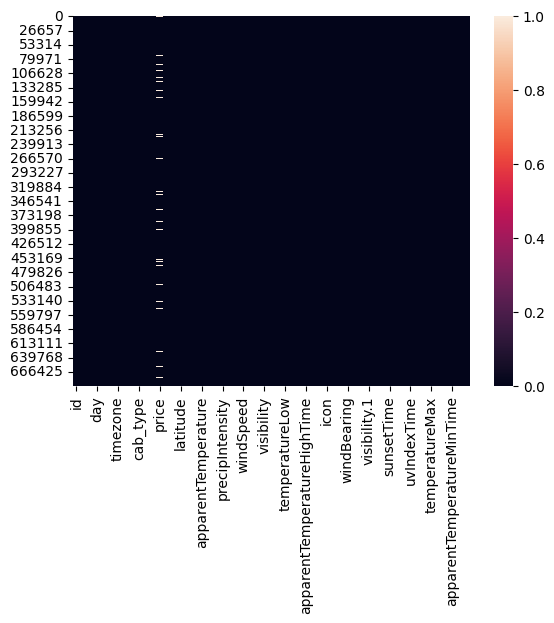

In [59]:
#Checking the distribution of null values
cols = rideshare.columns
sns.heatmap(rideshare[cols].isnull())
# only price columns has all the null values

In [60]:
rideshare.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [61]:
# to remove the null records
rideshare.dropna(axis=0,inplace=True)

In [62]:
# verifying if there are any null records
updated_null_records = rideshare.isnull().sum().sum()
updated_null_records

np.int64(0)

In [63]:
# visibility and visibility.1 are duplicate columns hence removing
## self comment - df['visibility'].sum() check using this and see if you get the same total with vis1 or
visibilityCheck = rideshare['visibility'].equals(rideshare['visibility.1'])
visibilityCheck
rideshare = rideshare.drop(['visibility.1'],axis=1)

In [64]:
#Delete some features using Domain knowledge
'''rideshare = rideshare.drop(['id','timestamp','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','temperatureHighTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id'],axis = 1)
print(rideshare.shape)
rideshare.head'''

"rideshare = rideshare.drop(['id','timestamp','apparentTemperatureHighTime','apparentTemperatureLowTime',\n                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',\n                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','temperatureHighTime','apparentTemperatureMaxTime'\n                 ,'latitude','longitude','product_id'],axis = 1)\nprint(rideshare.shape)\nrideshare.head"

In [65]:
# Delete data time and Year because all data in the same year
rideshare = rideshare.drop(['datetime'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 55)


,id,timestamp,hour,day,month,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [66]:
# Delete timezone because all data is in the same timezone
rideshare = rideshare.drop(['timezone'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 54)


,id,timestamp,hour,day,month,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## <a id='toc1_4_'></a>[Correlation of temperature related features with our target feature (Price)](#toc0_)

In [68]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [69]:
df_temp = rideshare[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75,9.0


<Axes: >

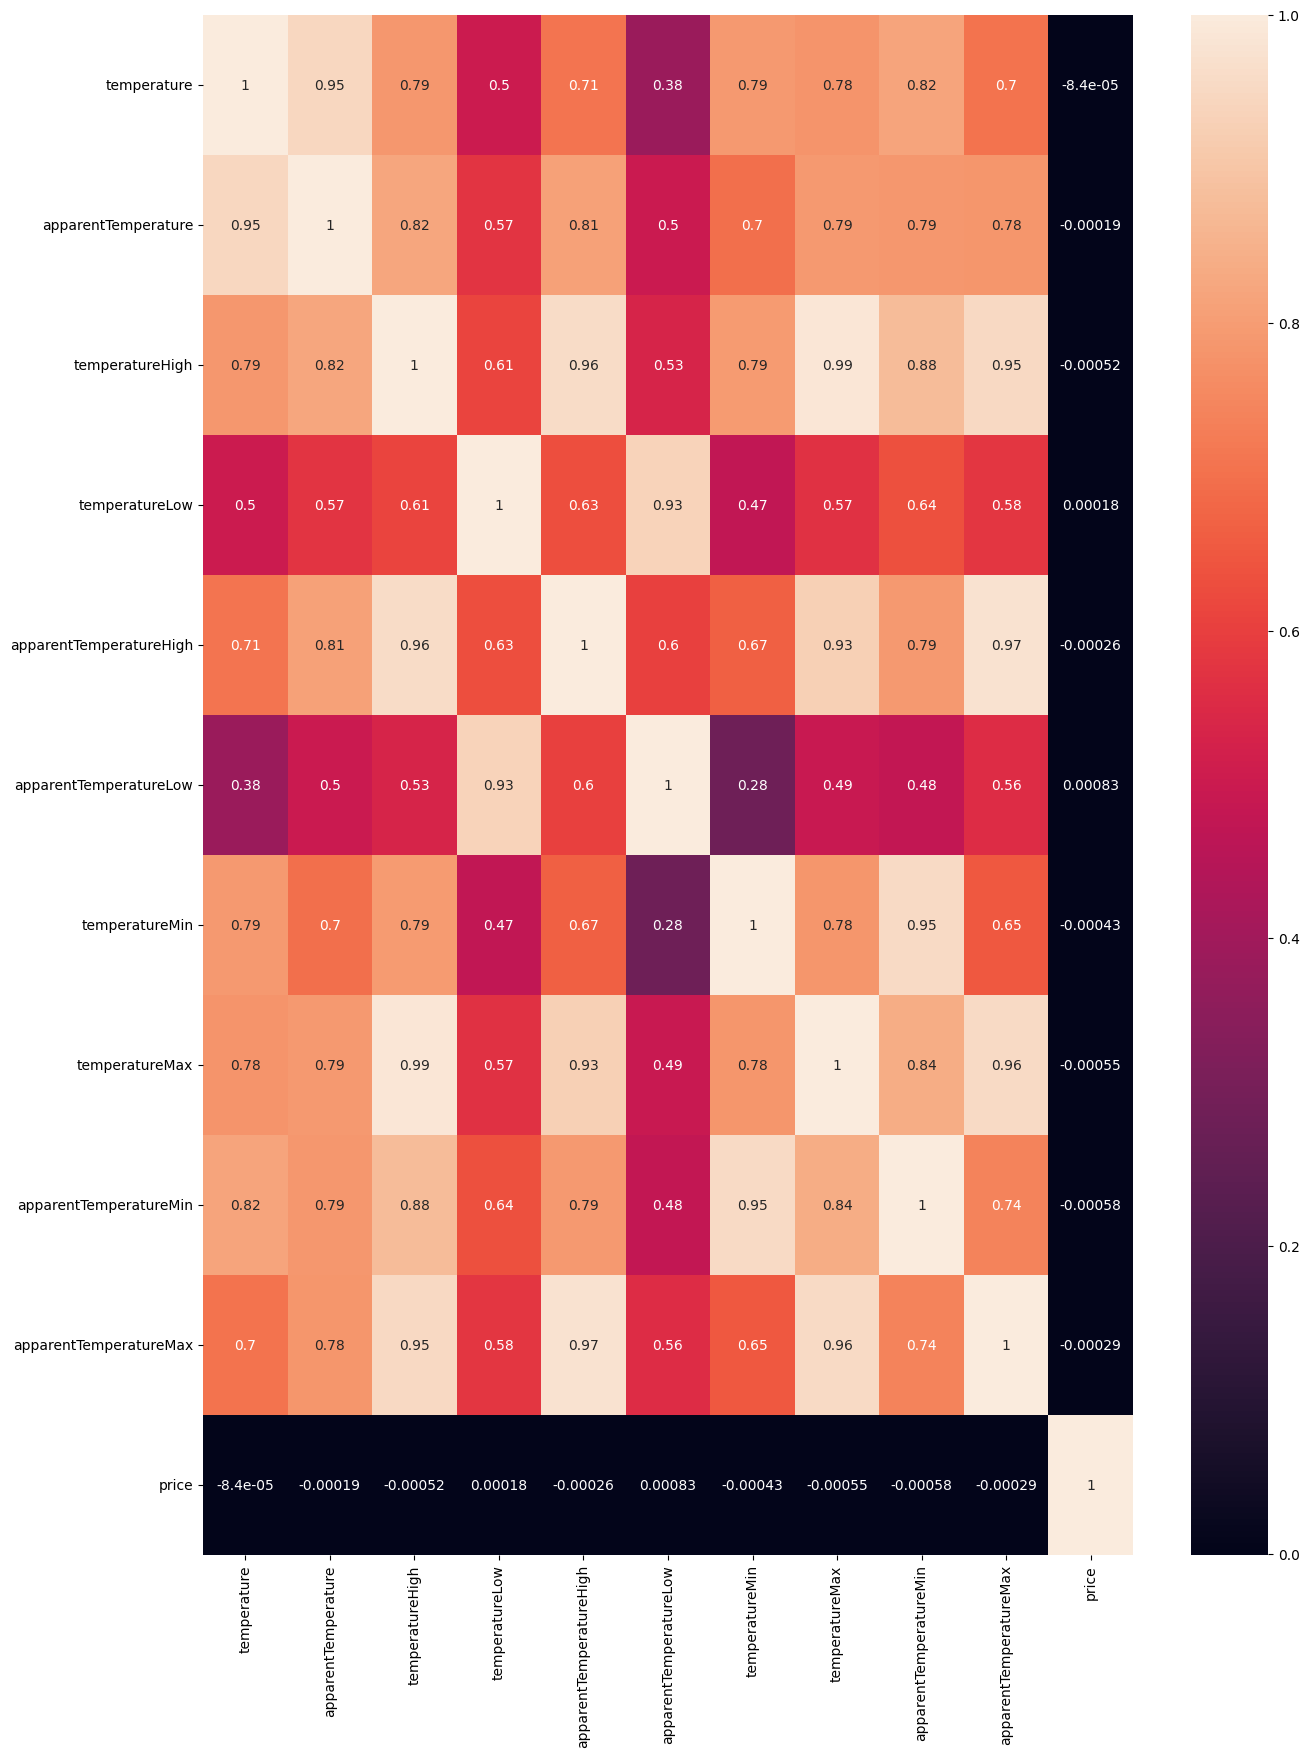

In [70]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Lets check the correlation of our Climate related features with our target feature (Price)

In [72]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = rideshare[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

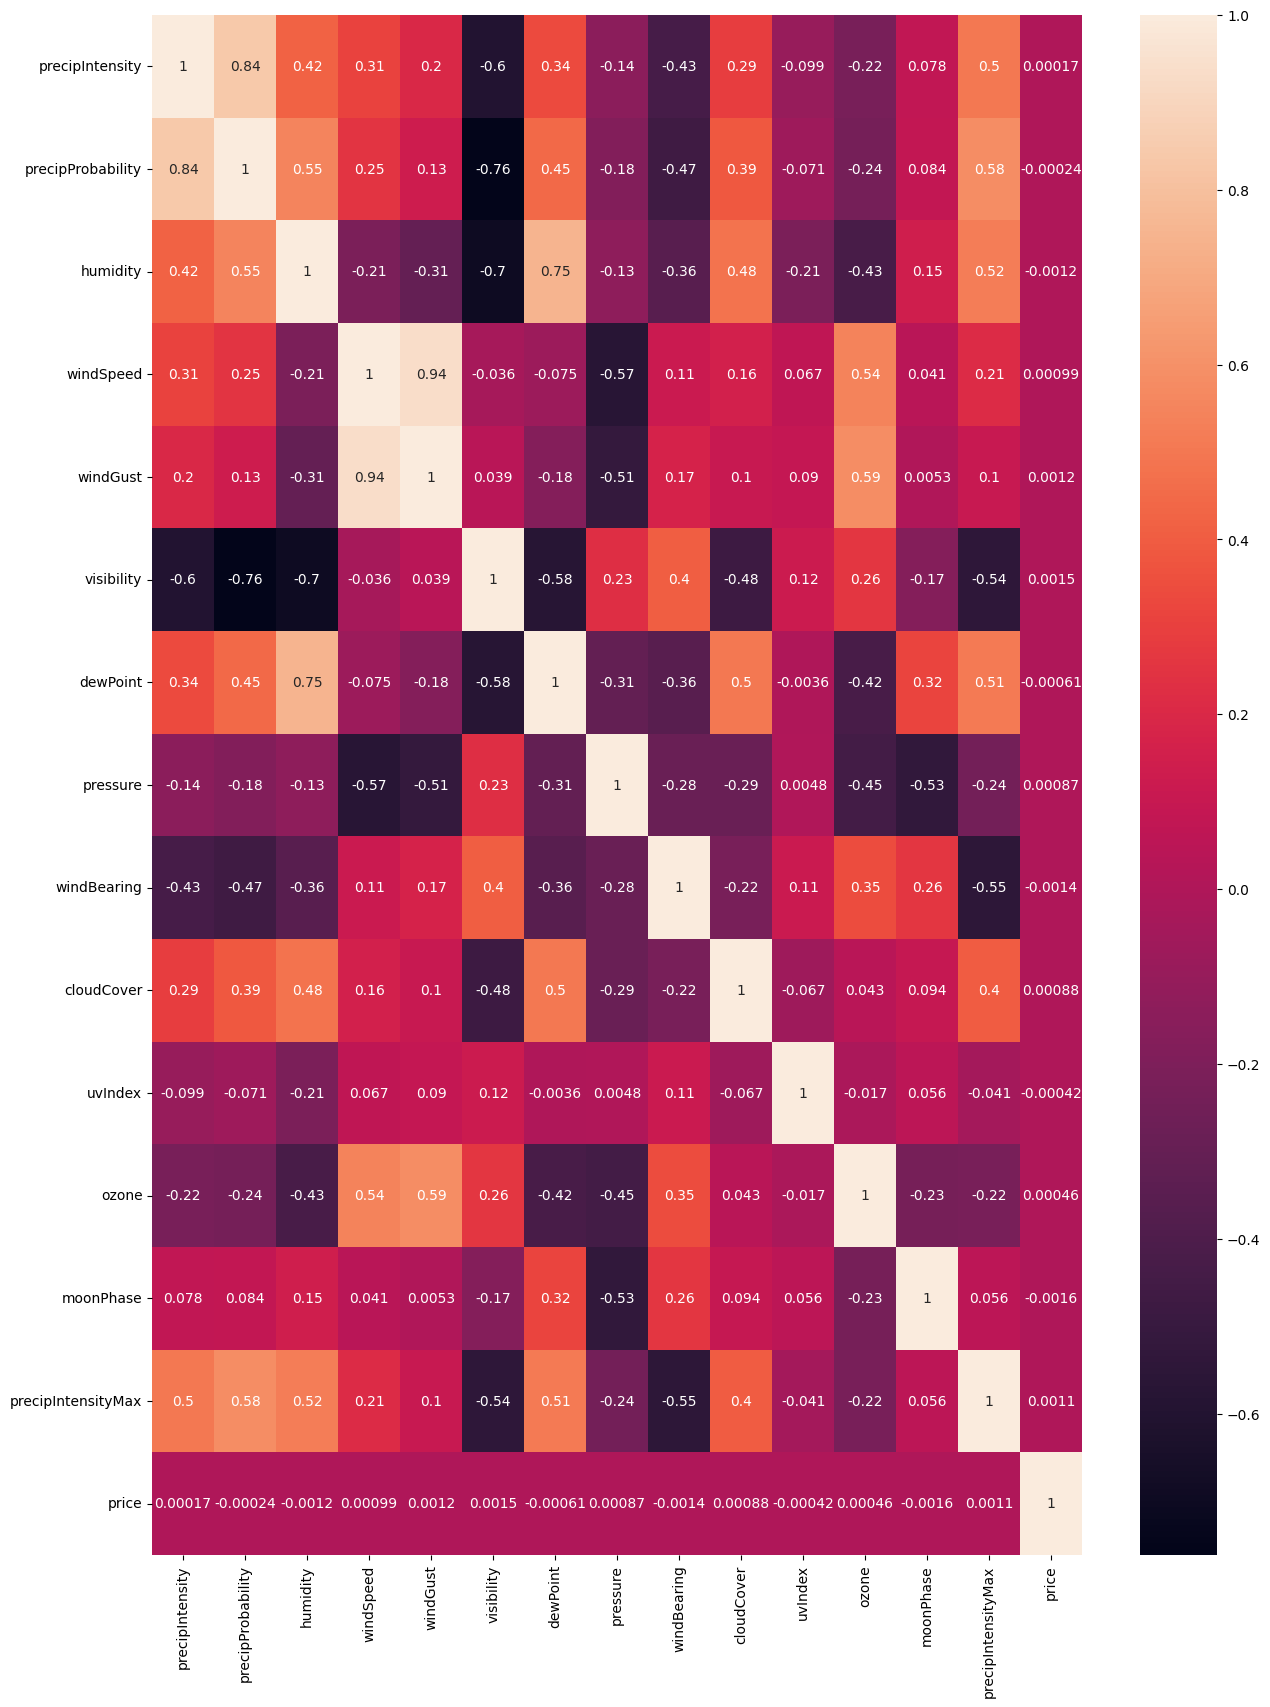

In [73]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

In [74]:
rideshare = rideshare.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
rideshare.shape

(637976, 40)

## <a id='toc1_5_'></a>[Correlation of our categorical features with our target feature (price)](#toc0_)

In [76]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = rideshare[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [78]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<Axes: >

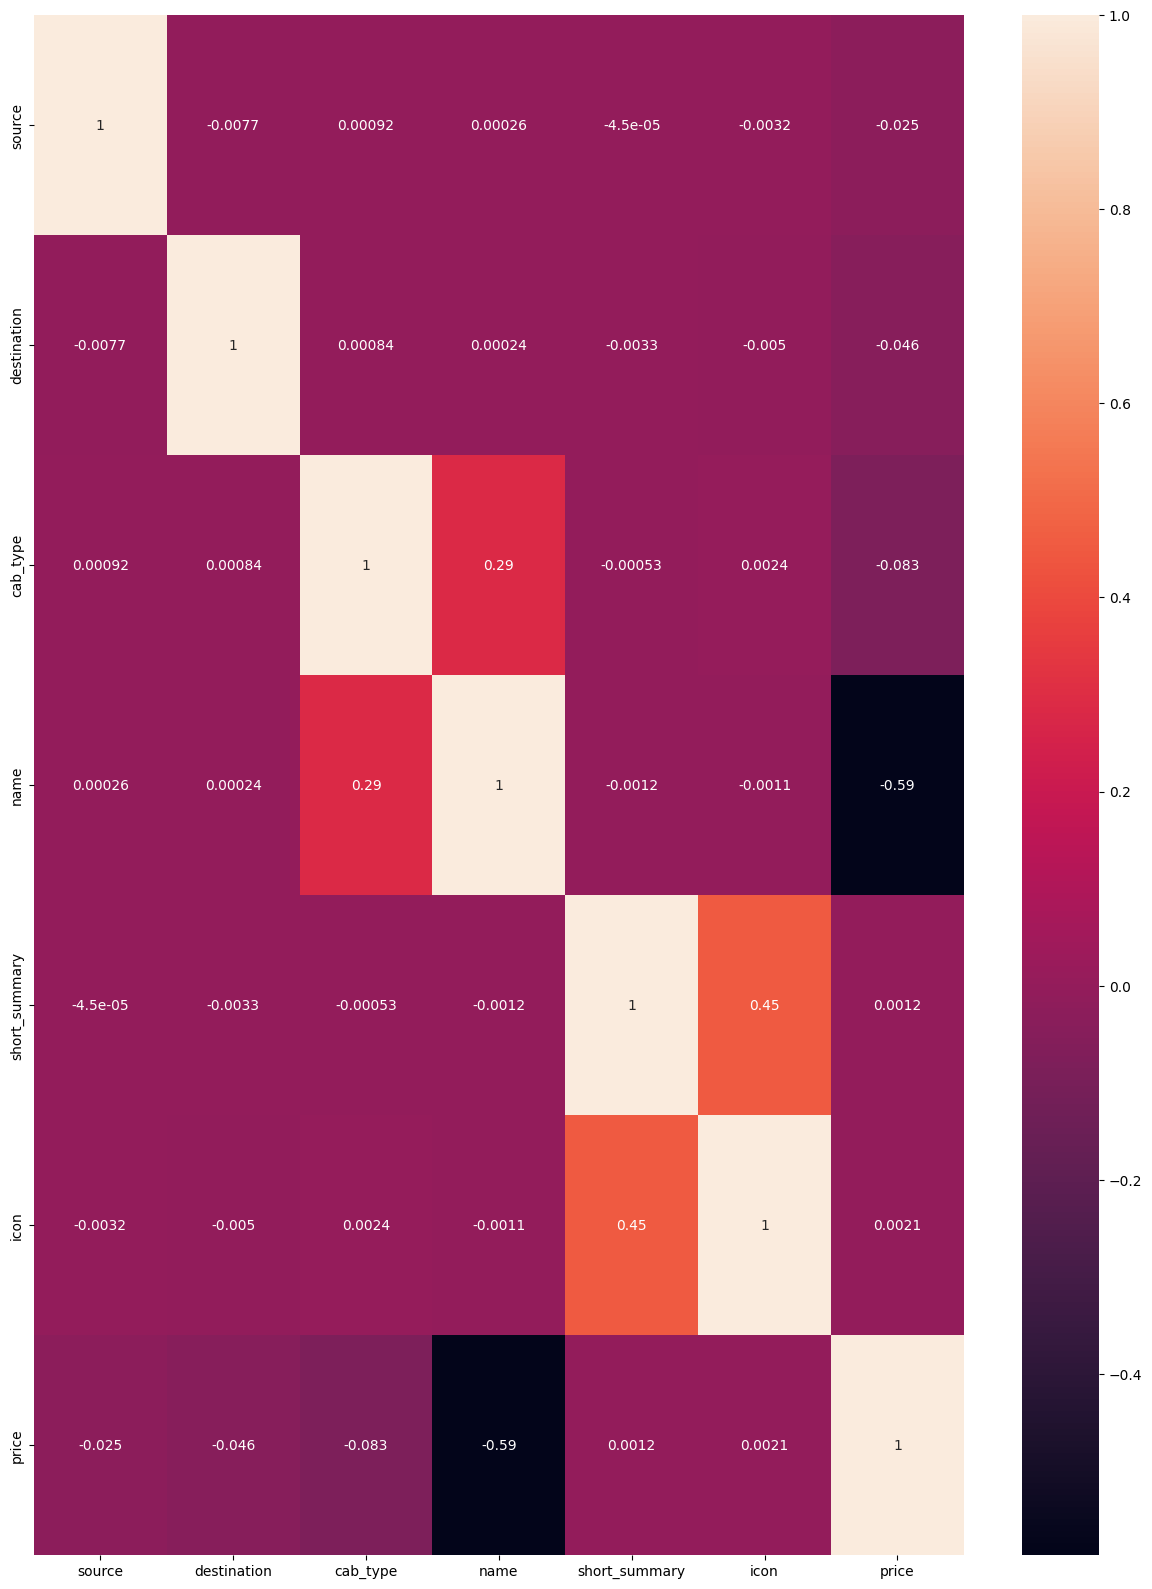

In [79]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, let us select cab_type feature because it has stronger correlation than other two features. Dropping rest of the columns.

## <a id='toc1_6_'></a>[Exploratory Data Analysis](#toc0_)

### <a id='toc1_6_1_'></a>[Price Distribution](#toc0_)

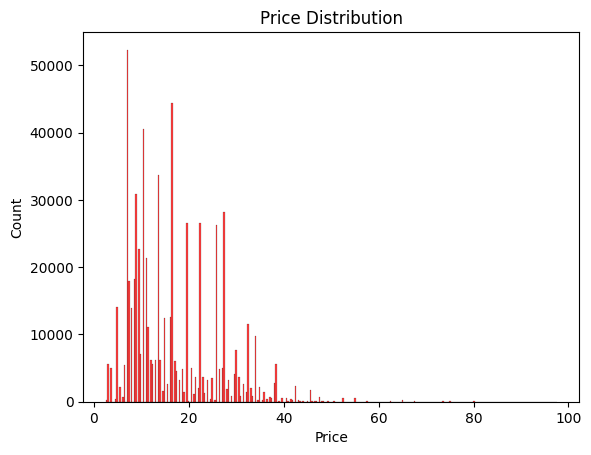

In [83]:
# Price Distribution
sns.histplot(rideshare['price'], color='red', kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

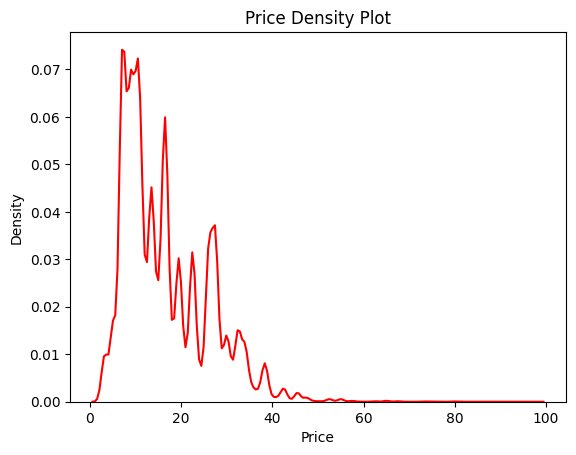

In [84]:
#Price Density Plot
sns.kdeplot(rideshare['price'], color='red')
plt.title('Price Density Plot')
plt.xlabel('Price')
plt.show()

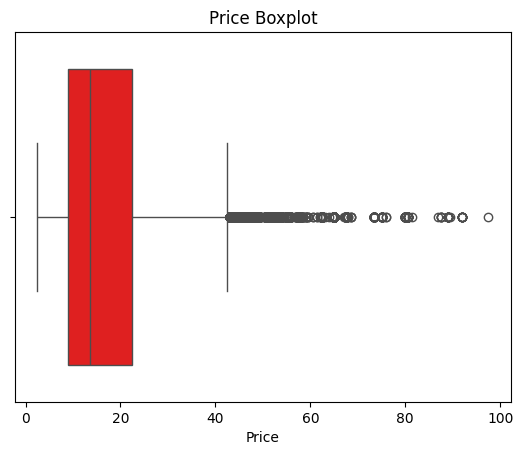

In [85]:
# Boxplot of Price
sns.boxplot(x=rideshare['price'], color='red')
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()


### <a id='toc1_6_2_'></a>[Price Range Distribution](#toc0_)

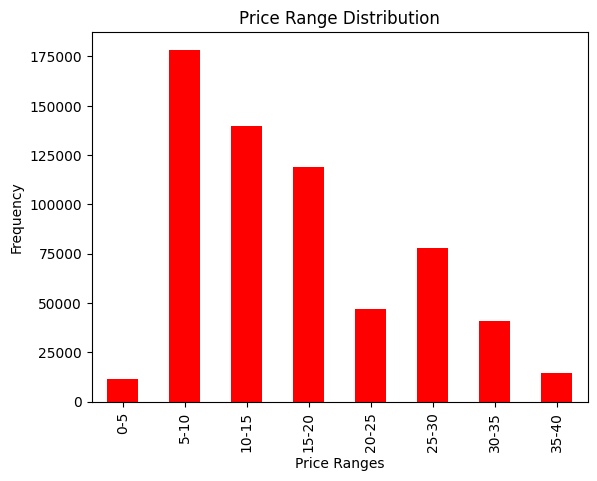

In [87]:
# Assuming you have a DataFrame df with a column 'price'
# Create bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]  # Define your bins as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30','30-35','35-40']
rideshare['price_bin'] = pd.cut(rideshare['price'], bins=bins, labels=labels, right=False)

# Get value counts of each bin
bin_counts = rideshare['price_bin'].value_counts().sort_index()

# Plotting
bin_counts.plot(kind='bar', color='red')
plt.title('Price Range Distribution')
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')
plt.show()


### <a id='toc1_6_3_'></a>[Time Series Analysis on Surge Multiplier](#toc0_)

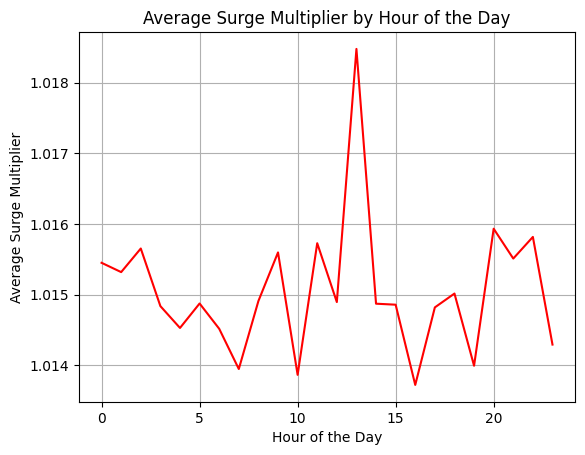

In [89]:
# Grouping by hour and calculating the average surge multiplier
hourly_surge = rideshare.groupby('hour')['surge_multiplier'].mean().reset_index()

# Plotting the line graph with red color
plt.plot(hourly_surge['hour'], hourly_surge['surge_multiplier'], color='red')
plt.title('Average Surge Multiplier by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Surge Multiplier')
plt.grid(True)
plt.show()

### <a id='toc1_6_4_'></a>[Day-to-Day Ride Distribution](#toc0_)

Text(0, 0.5, 'Frequency')

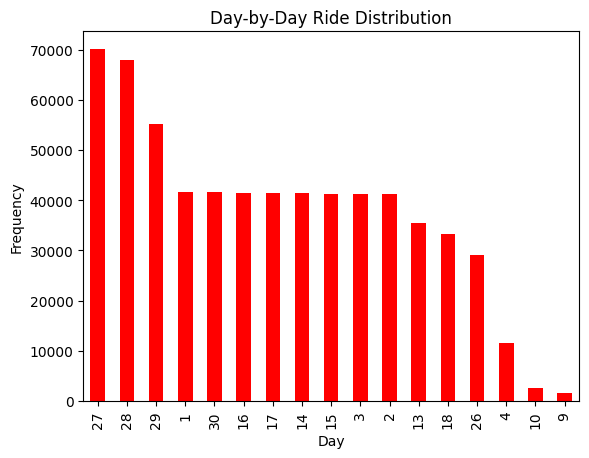

In [91]:

rideshare['day'].value_counts().plot(kind='bar', color='red')
plt.title("Day-by-Day Ride Distribution")
plt.xlabel("Day")
plt.ylabel("Frequency")

### <a id='toc1_6_5_'></a>[ Source and Destination Analysis](#toc0_)


In [93]:
rideshare['source'].value_counts()

source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64

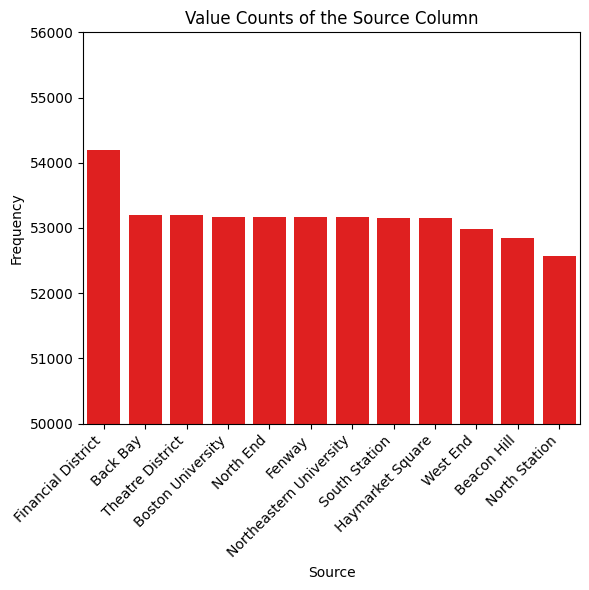

In [94]:
source_counts = rideshare['source'].value_counts().reset_index()
source_counts.columns = ['source', 'n']
source_counts = source_counts.sort_values(by='n', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(data=source_counts, x='source', y='n', color="red")
plt.title("Value Counts of the Source Column")
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate labels to match R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(50000, 56000)

plt.tight_layout()
plt.show()

Cabs have been booked from Financial District the most. 
Here we make a geospatial map to visualize our data which the departure point of the trips is Financial District. The map rendered by folium is interactive, we can slide, drag, and zoom in/out 

In [96]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = rideshare[rideshare['source']=='Financial District']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

We can see that trips with sources as Financial District have 3 groups or clusters of destination that contain many places (we can see them if we zoom the map). Many of them are in Boston area with 47140 data points.

### <a id='toc1_6_6_'></a>[Cab Type Value Counts](#toc0_)

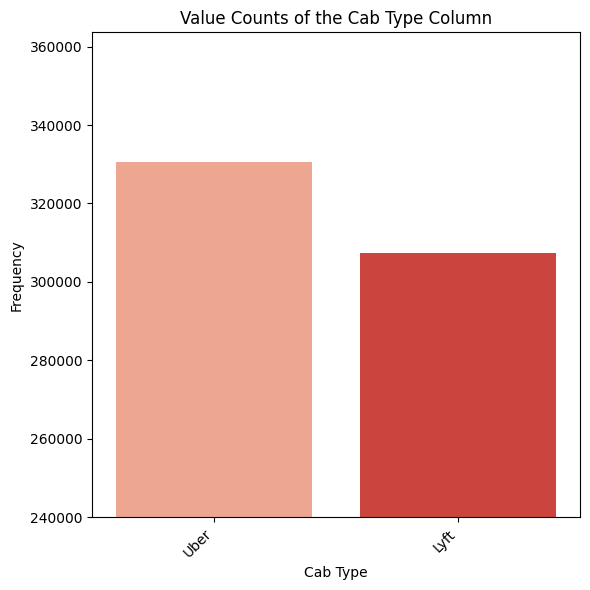

In [99]:
cab_type_counts = rideshare['cab_type'].value_counts().reset_index()
cab_type_counts.columns = ['cab_type', 'n']
cab_type_counts = cab_type_counts.sort_values(by='n', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(data=cab_type_counts, x='cab_type', y='n', palette="Reds", hue='cab_type', legend=False)
bar_plot.set_title("Value Counts of the Cab Type Column")
bar_plot.set_xlabel("Cab Type")
bar_plot.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Align text similar to R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(240000, cab_type_counts['n'].max() * 1.1)

plt.tight_layout()
plt.show()

### <a id='toc1_6_7_'></a>[Popular Source - Destination Combination](#toc0_)

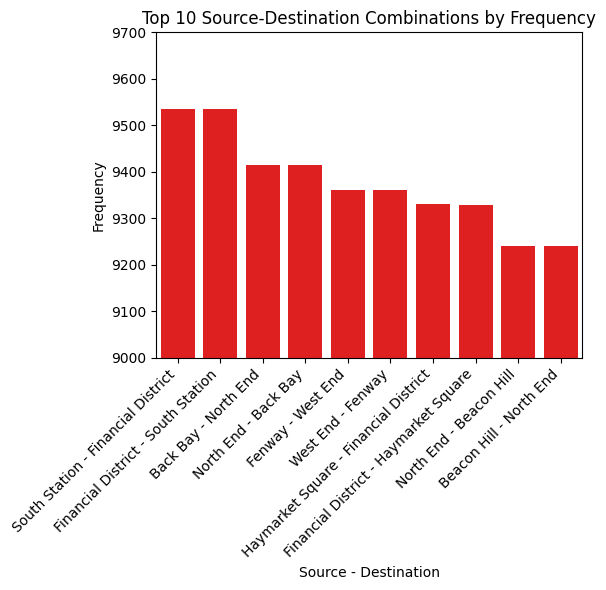

In [101]:
# Group by source and destination and count occurrences
grouped = rideshare.groupby(['source', 'destination']).size().reset_index(name='count')

# Sort the counts descending and select the most frequent
most_frequent_combos = grouped.sort_values(by='count', ascending=False).head(10)

# Create a new column combining source and destination
most_frequent_combos['source_destination'] = most_frequent_combos['source'] + " - " + most_frequent_combos['destination']

# Plotting
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(data=most_frequent_combos, x='source_destination', y='count', color='red')  # Set bar color to red
bar_plot.set_title("Top 10 Source-Destination Combinations by Frequency")
bar_plot.set_xlabel("Source - Destination")
bar_plot.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Align text similar to R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(9000, 9700)

plt.tight_layout()
plt.show()

### <a id='toc1_6_8_'></a>[Uber v/s Lyft : Rides by hour](#toc0_)

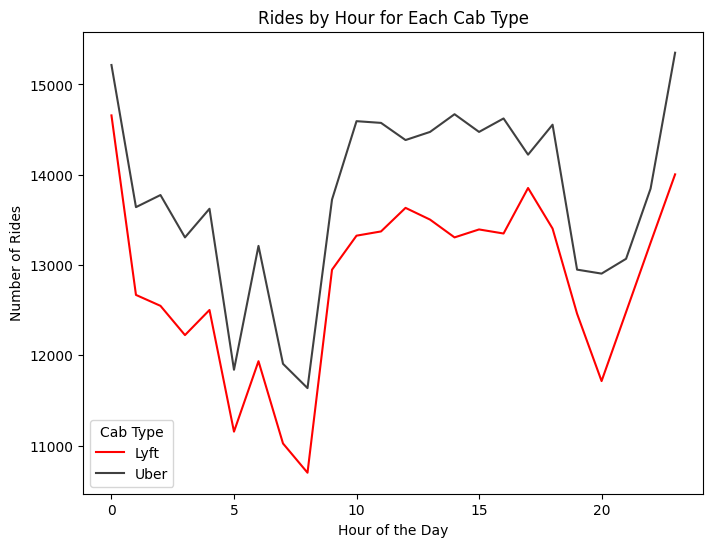

In [103]:
rides_by_hour = rideshare.groupby(['cab_type', 'hour']).size().reset_index(name='rides')
colors = ['#FF0000', '#404040']# Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(data=rides_by_hour, x='hour', y='rides', hue='cab_type', palette=colors, style='cab_type', dashes=False)
plt.title("Rides by Hour for Each Cab Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.legend(title='Cab Type')
#plt.palette("Reds")
sns.color_palette("flare", as_cmap=True)

plt.show()